# Activation Functions

+ Activation Functions are the Corner Stone of Machine Learning

+ Activation Functions will define how a processing unit will treat its input.

+ Most Commonly Used Activation Functions
    + Step Functions
    + Sigmoid Functions
    + Linear-Unit Functions

Import Libraries

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jupyterlab/conda/envs/python/lib/python3

+ Define a Basic Function that plots a surface for an Arbitrary Activation Funtion

+ The plot is done for all possible values of weights and bias between -0.5 and +0.5 with a step of 0.05.

+ The Input, weight and bias are one-Dimensional

+ The input can be passed as an argument

In [6]:
def plot_act(i=1.0, actfunc=lambda x: x):
    ws = np.arange(-0.5, 0.5, 0.05)
    bs = np.arange(-0.5, 0.5, 0.05)

    X, Y = np.meshgrid(ws, bs)

    os = np.array([actfunc(tf.constant(w*i + b)).eval(session=sess) \
                   for w,b in zip(np.ravel(X), np.ravel(Y))])

    Z = os.reshape(X.shape)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1)

### Basic Structure

+ In Tensorflow, the computation of weighted sum that goes into the neuron and direct it to the Activation Function.

In [5]:
# Start a Session
sess = tf.Session();
    
# Create a simple input of 3 real values
i = tf.constant([1.0,2.0,3.0], shape = [1,3])

# create matrix of weights
w = tf.random_normal(shape = [3,3])

# create a Vector of Biases
b = tf.random_normal(shape = [1,3])

# dummy activation function
def func(x): return x

#tf.matmul will multiply the input(i) tensor and the weight(w) tensor then sum the result with the bias(b) tensor
act = func(tf.matmul(i,w) +b)

# Evaluate the tensor to a numpy array
act.eval(session = sess)

array([[ 1.3624291,  3.3523903, -1.4308978]], dtype=float32)

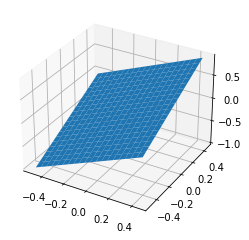

In [7]:
plot_act(1.0, func)

### Step Functions

+ Step Functions was first designed Activation Function for Machine Learning Algorithms

+ It consists of a threhold function that varies the y value from 0 to 1

+ This function has been utilized for classification problem

+ The Step Function act as a limiter

+ Every value goes through it, the function will be applied to get the value of 0 or 1

<img width="250" alt="Activation binary step" src="https://ibm.box.com/shared/static/kqect7hdbnpzb6ylnauimr1uxmx5634k.png">

+ Tensorflow doesn't have a Step Function

## Sigmoid Functions
### Logistic Regression (sigmoid)

+ It is widely used in Logistic Regression

+ Defined as $f(x) = \dfrac{1}{1 + e^{-x}}$. 

+ which will give a sigmoid over (0,1)

<img width="384" alt="Activation - Binary Step" src="https://ibm.box.com/shared/static/eryl0bvmczgfzemarakzgvgvgwe0c135.png">

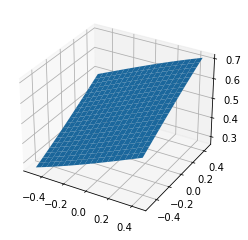

In [8]:
plot_act(1, tf.sigmoid)

3D sigmoid plot.
+ The x-axis is the weight, the y-axis is the bias.

#### Using the Sigmoid in a neural net layer

In [9]:
act = tf.sigmoid(tf.matmul(i,w) + b)
act.eval(session = sess)

array([[0.98560023, 0.77249724, 0.02415891]], dtype=float32)

+ The Arctangent and Hyperbolic Tangent Function, as the name implies, arebased on tangent Functions.

+ Arctangent is defined as  $f(x) = tan^{-1}x$,

+ it gives a sigmoid over $(\dfrac{-\pi}{2},\dfrac{\pi}{2})$ interval

<img width="384" alt="Activation - Atan" src="https://ibm.box.com/shared/static/ajw9xtnsux7hc4fi5pghatwak425xk7f.png">

+ It has no Implementation in Tensorflow

### tanh


+ Hyperbolic tangent Function

+ Defined as $f(x) = \dfrac{2}{1 + e^{-2x}} - 1$.

+ Gives a sigmoid over (-1, 1) interval

+ Widely used in variety of Applications

<img width="384" alt="Activation - TanH" src="https://ibm.box.com/shared/static/ylr2so4fnhwszxnw9hfmar9rphy4qlpn.png">

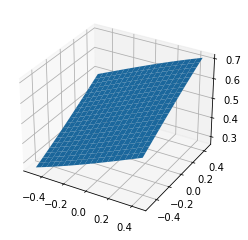

In [10]:
plot_act(1, tf.sigmoid)

3D tanh
+ x-axis = weight
+ y-axis = bias

#### Using tanh in a neural net layer

In [11]:
act = tf.tanh(tf.matmul(i,w) + b)
act.eval(session = sess)

array([[-0.992081 , -0.9959823, -0.9999978]], dtype=float32)

### Linear Unit Functions

+ Linear Units take concepts from both step and sigmoid and behave within the best of two functions

+ Linear unit is in general the variation of Rectified Linear Unit (ReLU)

+ ReLU is a functions that operates in  $[0,\infty)$ interval

<img width="384" alt="Activation - ReLU" src="https://ibm.box.com/shared/static/kblfxapmiioh20q6vmtd6qu579w689nz.png">


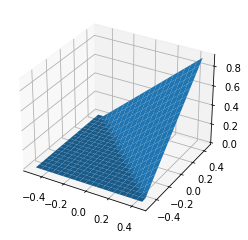

In [12]:
plot_act(1,tf.nn.relu)

3D relu
+ x-axis = weight
+ y-axis = bias

#### Using ReLU in Neural Net Layer

+ Tensorflow has ReLU and some other variants of this function

In [13]:
act = tf.nn.relu(tf.matmul(i,w) + b)
act.eval(session = sess)

array([[0.       , 5.7909756, 0.       ]], dtype=float32)